In [1]:
import nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#subclass of nn.Module, it interhits from it
class SimpleNN(nn.Module):
    # We overwrite the __init__() method, but call it in the super class.
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x, self)
        x = self.sigmoid1(x, self)
        x = self.fc2(x, self)
        x = self.sigmoid2(x, self)
        x = self.fc3(x, self)
        x = self.sigmoid3(x, self)
        return x

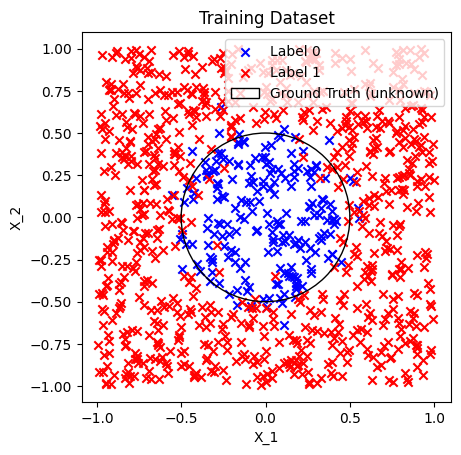

In [3]:
# -- Parameters --
# Change these parameters to improve your result.
num_epochs = 50000  # Number of epochs for training
beta = 0.1  # Learning rate
N_training = 1000  # Number of samples for training

# -- Create an instance of the model --
# The user uses the constructor implemented earlier to create an instance of the model.
input_size = 2
output_size = 1
model = SimpleNN(input_size, 6, 6, output_size)

# -- Generate random training data --
# We generate random data similar to Tutorial 1, problem 3 to train the neural network as a decoder.
np.random.seed(42)
x = 2 * np.random.rand(2, N_training) - 1
label = np.ones((1, N_training)) * (np.sqrt(x[0] ** 2 + x[1] ** 2) + 0.1 * np.random.randn(N_training) > 0.5)


# -- Define the loss function --
# The user initializes the loss function outside SimpleNN. This is similar to Pytorch.
criterion = nn.BCELoss()

# -- Plot --
# Create a scatterplot of the data and the decision boundary defined by the ground truth (which is unknown).
plt.figure(1)
y0_idx = (label[0, :] == 0).nonzero()[0]
y1_idx = (label[0, :] == 1).nonzero()[0]
plt.scatter(x[0, y0_idx], x[1, y0_idx], marker='x', color='b', label='Label 0')
plt.scatter(x[0, y1_idx], x[1, y1_idx], marker='x', color='r', label='Label 1')
circle1 = plt.Circle((0, 0), 0.5, edgecolor='black', fill=False, label='Ground Truth (unknown)')
ax = plt.gcf().gca()
ax.add_patch(circle1)
plt.title('Training Dataset')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.axis('square')
plt.show()

In [5]:
loss_vec = []
for epoch in range(num_epochs):
    # -- Forward propagation --
    # Pass the input through the neural network. Note that this calls the __call__() method in Module. Make sure
    # that this calls the forward() method the user defined earlier.
    outputs = model(x)

    # -- Compute loss --
    # In tutorial 1, we only computed the loss for plots. For training itself, only the gradient of the loss with
    # respect to the output was necessary.
    # Note that criterion() now gets another argument which is a handle to model. Use this to register criterion as
    # the loss function used by model.
    loss = criterion(label, outputs)
    loss_vec.append(loss)  # We track the loss to plot it later on

    # -- Backpropagation --
    # We set the gradients of all layers to zero first. Note that this does not require any parameters as module should
    # have a list of layers by now. Afterward, the backpropagation is started. This once again does not need any
    # parameters. The module goes through all layers, asks them to calculate the gradient and passes the result on
    # to the previous layer.
    model.zero_grad()
    model.backward()

    # -- Update Weights --
    # As all layers now have the gradient calculated, the model tells all of them to update their weights and biases
    # using the step size as defined by the parameter beta.
    model.step(beta)

TypeError: Linear.__call__() takes 2 positional arguments but 3 were given

In [ ]:
# -- Plot result --
# From here on, we only plot the result. There's nothing for you to do here.
plt.figure(3)
plt.clf()
plt.plot(loss_vec)
plt.xlabel('Epoch')
plt.ylabel('BCE')
plt.title('BCE v. Epoch')
plt.grid()

plt.figure(2)
plt.clf()
outputs = np.round(model(x))
y0_idx = (outputs[0, :] == 0).nonzero()[0]
y1_idx = (outputs[0, :] == 1).nonzero()[0]
plt.scatter(x[0, y0_idx], x[1, y0_idx], marker='o', color='b', label='Label 0')
plt.scatter(x[0, y1_idx], x[1, y1_idx], marker='o', color='r', label='Label 1')
circle1 = plt.Circle((0, 0), 0.5, edgecolor='black', fill=False, label='Ground Truth (unknown)')
ax = plt.gcf().gca()
ax.add_patch(circle1)
plt.title('Classification after Training')
plt.axis('square')

x0_min, x0_max = x[0, :].min() - 1, x[0, :].max() + 1
x1_min, x1_max = x[1, :].min() - 1, x[1, :].max() + 1
x0_grid, x1_grid = np.meshgrid(np.arange(x0_min, x0_max, 0.05), np.arange(x1_min, x1_max, 0.05))
xx = np.vstack([x0_grid.reshape((1, -1)), x1_grid.reshape((1, -1))])
a = model(xx).reshape(x0_grid.shape)
plt.contour(x0_grid, x1_grid, a, [0.5], colors=('orange',))
plt.legend()
plt.show()


